In [1]:
!pip install folium
import folium
import numpy as np
import requests
import pandas as pd
import datetime
from folium.plugins import MarkerCluster
from matplotlib.pyplot import figure
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import svm
from sklearn import datasets
from sklearn.model_selection import KFold, train_test_split

# Initial Data Collection 

### We are reading in two different csv files, the first file is all the arrests logged in New York City ranging from Jan 2006 - Dec 2020.  We then take the column associated to the date of the arrest and make a new column storing only the year allowing us to separate the dataframe by year easier.  The second csv file is all the arrests logged in the year 2021 so far.

In [2]:
arrest_table = pd.read_csv("../FinalTutorial/NYPD_Arrests_Data__Historic_.csv")
arrest_table['year'] = arrest_table['ARREST_DATE'].str[-4:]

arrest_table = arrest_table[arrest_table['year'] >= '2010']
arrest_table

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lon_Lat,year
1,192799737,01/26/2019,177.0,SEXUAL ABUSE,116.0,SEX CRIMES,PL 1306503,F,M,25,0.0,45-64,M,BLACK,1000555.0,230994.0,40.800694,-73.941109,POINT (-73.94110928599997 40.800694331000045),2019
2,193260691,02/06/2019,NaN,NaN,NaN,NaN,PL 2203400,F,M,14,0.0,25-44,M,UNKNOWN,986685.0,215375.0,40.757839,-73.991212,POINT (-73.99121211099998 40.75783900300007),2019
3,149117452,01/06/2016,153.0,RAPE 3,104.0,RAPE,PL 1302503,F,K,67,0.0,25-44,M,BLACK,998032.0,175598.0,40.648650,-73.950336,POINT (-73.95033556299995 40.648650085000035),2016
4,190049060,11/15/2018,157.0,RAPE 1,104.0,RAPE,PL 1303501,F,K,77,0.0,25-44,M,BLACK,1003606.0,185050.0,40.674583,-73.930222,POINT (-73.93022154099998 40.67458330800008),2018
6,189182271,10/24/2018,153.0,RAPE 3,104.0,RAPE,PL 1302503,F,M,5,0.0,45-64,M,WHITE HISPANIC,984946.0,200203.0,40.716196,-73.997491,POINT (-73.99749074599998 40.716195914000025),2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5153364,207601040,01/08/2020,273.0,"TAMPERING 1,CRIMINAL",121.0,CRIMINAL MISCHIEF & RELATED OF,PL 1452000,F,M,1,1.0,25-44,M,BLACK HISPANIC,980772.0,194845.0,40.701489,-74.012545,POINT (-74.01254496799999 40.70148881400007),2020
5153365,206891807,01/01/2020,113.0,"MENACING,UNCLASSIFIED",344.0,ASSAULT 3 & RELATED OFFENSES,PL 1201401,M,K,90,0.0,<18,M,BLACK,993514.0,197321.0,40.708281,-73.966587,POINT (-73.96658711699997 40.70828068800005),2020
5153366,207760542,01/11/2020,339.0,"LARCENY,PETIT FROM OPEN AREAS,",341.0,PETIT LARCENY,PL 1552500,M,M,13,0.0,25-44,M,WHITE,986464.0,208227.0,40.738220,-73.992012,POINT (-73.99201218099995 40.73821959500003),2020
5153367,206896678,01/01/2020,105.0,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,Q,111,0.0,45-64,M,BLACK,1053534.0,211808.0,40.747777,-73.749952,POINT (-73.74995244099993 40.74777741400004),2020


In [3]:
table2021 = pd.read_csv("../FinalTutorial/NYPD_Arrest_Data__Year_to_Date_.csv")
table2021

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
0,234233843,09/29/2021,105.0,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,B,42,0,25-44,M,BLACK,1009231,240290,40.826189,-73.909738,POINT (-73.90973778899996 40.82618898100003)
1,234129823,09/27/2021,157.0,RAPE 1,104.0,RAPE,PL 1303501,F,K,77,0,25-44,M,BLACK,1003606,185050,40.674583,-73.930222,POINT (-73.93022154099998 40.67458330800008)
2,234040747,09/25/2021,109.0,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 1200501,F,Q,101,0,25-44,M,BLACK,1049232,159210,40.603441,-73.765986,POINT (-73.76598558899997 40.60344094100003)
3,234047720,09/25/2021,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,B,44,0,25-44,M,BLACK,1006537,244511,40.837782,-73.919458,POINT (-73.91945797099999 40.83778161800007)
4,234042526,09/25/2021,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,B,44,0,25-44,M,BLACK,1007418,243859,40.835990,-73.916276,POINT (-73.91627635999998 40.83598980000005)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115294,222689440,01/06/2021,109.0,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 1200501,F,Q,102,0,18-24,M,ASIAN / PACIFIC ISLANDER,1031076,193779,40.698440,-73.831130,POINT (-73.83112953899997 40.69843969400005)
115295,222626401,01/05/2021,109.0,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 1200502,F,B,49,0,25-44,M,BLACK HISPANIC,1027430,251105,40.855803,-73.843910,POINT (-73.84390995399998 40.85580274300003)
115296,222477062,01/01/2021,922.0,"TRAFFIC,UNCLASSIFIED MISDEMEAN",348.0,VEHICLE AND TRAFFIC LAWS,VTL0511001,M,B,50,0,25-44,M,WHITE HISPANIC,1011047,256269,40.870041,-73.903112,POINT (-73.90311219699998 40.870041281000056)
115297,222728174,01/07/2021,339.0,"LARCENY,PETIT FROM OPEN AREAS,",341.0,PETIT LARCENY,PL 1552500,M,Q,114,0,25-44,M,WHITE HISPANIC,1007694,219657,40.769561,-73.915363,POINT (-73.91536344699995 40.76956124200007)


#### 

### Here we are splitting the large dataframe up by the years into separate dataframes making it easier to organize the data and manipulate it later down the road.

In [3]:
table2010 = arrest_table[arrest_table['year'] == '2010']
table2011 = arrest_table[arrest_table['year'] == '2011']
table2012 = arrest_table[arrest_table['year'] == '2012']
table2013 = arrest_table[arrest_table['year'] == '2013']
table2014 = arrest_table[arrest_table['year'] == '2014']
table2015 = arrest_table[arrest_table['year'] == '2015']
table2016 = arrest_table[arrest_table['year'] == '2016']
table2017 = arrest_table[arrest_table['year'] == '2017']
table2018 = arrest_table[arrest_table['year'] == '2018']
table2019 = arrest_table[arrest_table['year'] == '2019']
table2020 = arrest_table[arrest_table['year'] == '2020']

#### 

### We now begin to clean up each dataset by first taking a sample of the data since it is too large to be able to run on its own.  Next, we drop columns that we find to be unhelpful and confusing as well as rename the columns we kept so they are easier to understand what it represents.

In [4]:
len2010 = len(table2010)


bronxA2010 = len(table2010[table2010['ARREST_BORO'] == 'B'])
statenA2010 = len(table2010[table2010['ARREST_BORO'] == 'S'])
brooklynA2010 = len(table2010[table2010['ARREST_BORO'] == 'K'])
manhattanA2010 = len(table2010[table2010['ARREST_BORO'] == 'M'])
queensA2010 = len(table2010[table2010['ARREST_BORO'] == 'Q'])

table2010 = table2010.sample(6000)
table2010['Latitude'] = table2010['Latitude'].astype(float)
table2010['Longitude'] = table2010['Longitude'].astype(float)
table2010 = table2010.drop(columns=['JURISDICTION_CODE', 'ARREST_PRECINCT', 'X_COORD_CD', 'Y_COORD_CD',
                                         'Lon_Lat', 'LAW_CODE', 'PD_CD', 'KY_CD'])

table2010.rename({'ARREST_DATE': 'Date', 'PERP_SEX': 'Sex', 'PERP_RACE': 'Race', 'AGE_GROUP': 'Age'}, axis='columns', inplace=True)

In [5]:
len2011 = len(table2011)

bronxA2011 = len(table2011[table2011['ARREST_BORO'] == 'B'])
statenA2011 = len(table2011[table2011['ARREST_BORO'] == 'S'])
brooklynA2011 = len(table2011[table2011['ARREST_BORO'] == 'K'])
manhattanA2011 = len(table2011[table2011['ARREST_BORO'] == 'M'])
queensA2011 = len(table2011[table2011['ARREST_BORO'] == 'Q'])

table2011 = table2011.sample(6000)
table2011['Latitude'] = table2011['Latitude'].astype(float)
table2011['Longitude'] = table2011['Longitude'].astype(float)
table2011 = table2011.drop(columns=['JURISDICTION_CODE', 'ARREST_PRECINCT', 'X_COORD_CD', 'Y_COORD_CD',
                                         'Lon_Lat', 'LAW_CODE', 'PD_CD', 'KY_CD'])

table2011.rename({'ARREST_DATE': 'Date', 'PERP_SEX': 'Sex', 'PERP_RACE': 'Race', 'AGE_GROUP': 'Age'}, axis='columns', inplace=True)

In [6]:
len2012 = len(table2012)


bronxA2012 = len(table2012[table2012['ARREST_BORO'] == 'B'])
statenA2012 = len(table2012[table2012['ARREST_BORO'] == 'S'])
brooklynA2012 = len(table2012[table2012['ARREST_BORO'] == 'K'])
manhattanA2012 = len(table2012[table2012['ARREST_BORO'] == 'M'])
queensA2012 = len(table2012[table2012['ARREST_BORO'] == 'Q'])

table2012 = table2012.sample(6000)
table2012['Latitude'] = table2012['Latitude'].astype(float)
table2012['Longitude'] = table2012['Longitude'].astype(float)
table2012 = table2012.drop(columns=['JURISDICTION_CODE', 'ARREST_PRECINCT', 'X_COORD_CD', 'Y_COORD_CD',
                                         'Lon_Lat', 'LAW_CODE', 'PD_CD', 'KY_CD'])

table2012.rename({'ARREST_DATE': 'Date', 'PERP_SEX': 'Sex', 'PERP_RACE': 'Race', 'AGE_GROUP': 'Age'}, axis='columns', inplace=True)

In [7]:
len2013 = len(table2013)

bronxA2013 = len(table2013[table2013['ARREST_BORO'] == 'B'])
statenA2013 = len(table2013[table2013['ARREST_BORO'] == 'S'])
brooklynA2013 = len(table2013[table2013['ARREST_BORO'] == 'K'])
manhattanA2013 = len(table2013[table2013['ARREST_BORO'] == 'M'])
queensA2013 = len(table2013[table2013['ARREST_BORO'] == 'Q'])

table2013 = table2013.sample(6000)
table2013['Latitude'] = table2013['Latitude'].astype(float)
table2013['Longitude'] = table2013['Longitude'].astype(float)
table2013 = table2013.drop(columns=['JURISDICTION_CODE', 'ARREST_PRECINCT', 'X_COORD_CD', 'Y_COORD_CD',
                                         'Lon_Lat', 'LAW_CODE', 'PD_CD', 'KY_CD'])

table2013.rename({'ARREST_DATE': 'Date', 'PERP_SEX': 'Sex', 'PERP_RACE': 'Race', 'AGE_GROUP': 'Age'}, axis='columns', inplace=True)

In [8]:
len2014 = len(table2014)


bronxA2014 = len(table2014[table2014['ARREST_BORO'] == 'B'])
statenA2014 = len(table2014[table2014['ARREST_BORO'] == 'S'])
brooklynA2014 = len(table2014[table2014['ARREST_BORO'] == 'K'])
manhattanA2014 = len(table2014[table2014['ARREST_BORO'] == 'M'])
queensA2014 = len(table2014[table2014['ARREST_BORO'] == 'Q'])

table2014 = table2014.sample(6000)
table2014['Latitude'] = table2014['Latitude'].astype(float)
table2014['Longitude'] = table2014['Longitude'].astype(float)
table2014 = table2014.drop(columns=['JURISDICTION_CODE', 'ARREST_PRECINCT', 'X_COORD_CD', 'Y_COORD_CD',
                                         'Lon_Lat', 'LAW_CODE', 'PD_CD', 'KY_CD'])

table2014.rename({'ARREST_DATE': 'Date', 'PERP_SEX': 'Sex', 'PERP_RACE': 'Race', 'AGE_GROUP': 'Age'}, axis='columns', inplace=True)

In [9]:
len2015 = len(table2015)

bronxA2015 = len(table2015[table2015['ARREST_BORO'] == 'B'])
statenA2015 = len(table2015[table2015['ARREST_BORO'] == 'S'])
brooklynA2015 = len(table2015[table2015['ARREST_BORO'] == 'K'])
manhattanA2015 = len(table2015[table2015['ARREST_BORO'] == 'M'])
queensA2015 = len(table2015[table2015['ARREST_BORO'] == 'Q'])

table2015 = table2015.sample(6000)
table2015['Latitude'] = table2015['Latitude'].astype(float)
table2015['Longitude'] = table2015['Longitude'].astype(float)
table2015 = table2015.drop(columns=['JURISDICTION_CODE', 'ARREST_PRECINCT', 'X_COORD_CD', 'Y_COORD_CD',
                                         'Lon_Lat', 'LAW_CODE', 'PD_CD', 'KY_CD'])

table2015.rename({'ARREST_DATE': 'Date', 'PERP_SEX': 'Sex', 'PERP_RACE': 'Race', 'AGE_GROUP': 'Age'}, axis='columns', inplace=True)

In [10]:
len2016 = len(table2016)


bronxA2016 = len(table2016[table2016['ARREST_BORO'] == 'B'])
statenA2016 = len(table2016[table2016['ARREST_BORO'] == 'S'])
brooklynA2016 = len(table2016[table2016['ARREST_BORO'] == 'K'])
manhattanA2016 = len(table2016[table2016['ARREST_BORO'] == 'M'])
queensA2016 = len(table2016[table2016['ARREST_BORO'] == 'Q'])

table2016 = table2016.sample(6000)
table2016['Latitude'] = table2016['Latitude'].astype(float)
table2016['Longitude'] = table2016['Longitude'].astype(float)
table2016 = table2016.drop(columns=['JURISDICTION_CODE', 'ARREST_PRECINCT', 'X_COORD_CD', 'Y_COORD_CD',
                                         'Lon_Lat', 'LAW_CODE', 'PD_CD', 'KY_CD'])

table2016.rename({'ARREST_DATE': 'Date', 'PERP_SEX': 'Sex', 'PERP_RACE': 'Race', 'AGE_GROUP': 'Age'}, axis='columns', inplace=True)

In [11]:
len2017 = len(table2017)

bronxA2017 = len(table2017[table2017['ARREST_BORO'] == 'B'])
statenA2017 = len(table2017[table2017['ARREST_BORO'] == 'S'])
brooklynA2017 = len(table2017[table2017['ARREST_BORO'] == 'K'])
manhattanA2017 = len(table2017[table2017['ARREST_BORO'] == 'M'])
queensA2017 = len(table2017[table2017['ARREST_BORO'] == 'Q'])

table2017 = table2017.sample(6000)
table2017['Latitude'] = table2017['Latitude'].astype(float)
table2017['Longitude'] = table2017['Longitude'].astype(float)
table2017 = table2017.drop(columns=['JURISDICTION_CODE', 'ARREST_PRECINCT', 'X_COORD_CD', 'Y_COORD_CD',
                                         'Lon_Lat', 'LAW_CODE', 'PD_CD', 'KY_CD'])

table2017.rename({'ARREST_DATE': 'Date', 'PERP_SEX': 'Sex', 'PERP_RACE': 'Race', 'AGE_GROUP': 'Age'}, axis='columns', inplace=True)

In [12]:
len2018 = len(table2018)

bronxA2018 = len(table2018[table2018['ARREST_BORO'] == 'B'])
statenA2018 = len(table2018[table2018['ARREST_BORO'] == 'S'])
brooklynA2018 = len(table2018[table2018['ARREST_BORO'] == 'K'])
manhattanA2018 = len(table2018[table2018['ARREST_BORO'] == 'M'])
queensA2018 = len(table2018[table2018['ARREST_BORO'] == 'Q'])

table2018 = table2018.sample(6000)
table2018['Latitude'] = table2018['Latitude'].astype(float)
table2018['Longitude'] = table2018['Longitude'].astype(float)
table2018 = table2018.drop(columns=['JURISDICTION_CODE', 'ARREST_PRECINCT', 'X_COORD_CD', 'Y_COORD_CD',
                                         'Lon_Lat', 'LAW_CODE', 'PD_CD', 'KY_CD'])

table2018.rename({'ARREST_DATE': 'Date', 'PERP_SEX': 'Sex', 'PERP_RACE': 'Race', 'AGE_GROUP': 'Age'}, axis='columns', inplace=True)

In [13]:
len2019 = len(table2019)

bronxA2019 = len(table2019[table2019['ARREST_BORO'] == 'B'])
statenA2019 = len(table2019[table2019['ARREST_BORO'] == 'S'])
brooklynA2019 = len(table2019[table2019['ARREST_BORO'] == 'K'])
manhattanA2019 = len(table2019[table2019['ARREST_BORO'] == 'M'])
queensA2019 = len(table2019[table2019['ARREST_BORO'] == 'Q'])

table2019 = table2019.sample(6000)
table2019['Latitude'] = table2019['Latitude'].astype(float)
table2019['Longitude'] = table2019['Longitude'].astype(float)
table2019 = table2019.drop(columns=['JURISDICTION_CODE', 'ARREST_PRECINCT', 'X_COORD_CD', 'Y_COORD_CD',
                                         'Lon_Lat', 'LAW_CODE', 'PD_CD', 'KY_CD'])

table2019.rename({'ARREST_DATE': 'Date', 'PERP_SEX': 'Sex', 'PERP_RACE': 'Race', 'AGE_GROUP': 'Age'}, axis='columns', inplace=True)

In [14]:
len2020 = len(table2020)
bronxA2020 = len(table2020[table2020['ARREST_BORO'] == 'B'])
statenA2020 = len(table2020[table2020['ARREST_BORO'] == 'S'])
brooklynA2020 = len(table2020[table2020['ARREST_BORO'] == 'K'])
manhattanA2020 = len(table2020[table2020['ARREST_BORO'] == 'M'])
queensA2020 = len(table2020[table2020['ARREST_BORO'] == 'Q'])
table2020 = table2020.sample(6000)
table2020['Latitude'] = table2020['Latitude'].astype(float)
table2020['Longitude'] = table2020['Longitude'].astype(float)
table2020 = table2020.drop(columns=['JURISDICTION_CODE', 'ARREST_PRECINCT', 'X_COORD_CD', 'Y_COORD_CD',
                                         'Lon_Lat', 'LAW_CODE', 'PD_CD', 'KY_CD'])
table2020.rename({'ARREST_DATE': 'Date', 'PERP_SEX': 'Sex', 'PERP_RACE': 'Race', 'AGE_GROUP': 'Age'}, axis='columns', inplace=True)

In [4]:
len2021 = len(table2021)
table2021['Latitude'] = table2021['Latitude'].astype(float)
table2021['Longitude'] = table2021['Longitude'].astype(float)
table2021 = table2021.drop(columns=['JURISDICTION_CODE', 'ARREST_PRECINCT', 'X_COORD_CD', 'Y_COORD_CD',
                                         'New Georeferenced Column', 'LAW_CODE', 'PD_CD', 'KY_CD'])
table2021.rename({'ARREST_DATE': 'Date', 'PERP_SEX': 'Sex', 'PERP_RACE': 'Race', 'AGE_GROUP': 'Age'}, axis='columns', inplace=True)

#### 
### We are now creating a regression plot representing the number of arrests occured in New York City over time.  

Text(0.5, 1.0, 'Number of Arrests in NYC vs Time (2010-2021)')

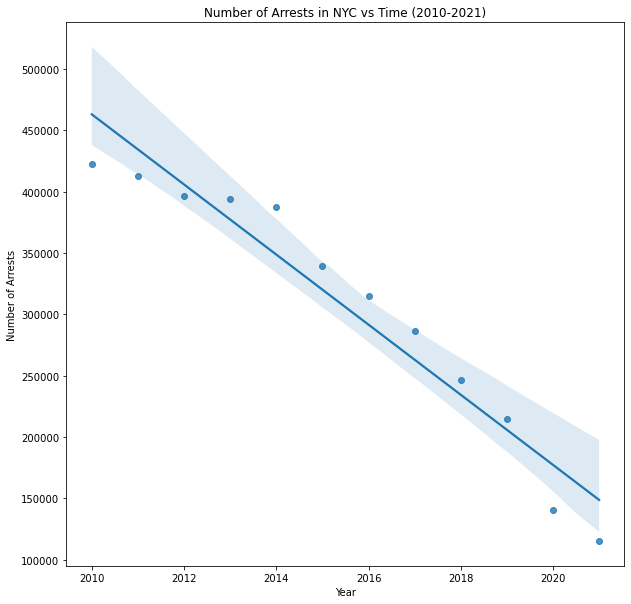

In [16]:
plt.figure(figsize=(10,10))
xval = [2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021]
yval = [len2010,len2011,len2012,len2013,len2014,len2015,len2016,len2017,len2018,len2019,len2020,len2021]

xval2 = [[2010,len2010], [2011,len2011], [2012,len2012], [2013,len2013], [2014,len2014], 
         [2015,len2015], [2016,len2016], [2017,len2017], [2018,len2018], [2019,len2019], [2020,len2020], [2021,len2021]]
numArrests = pd.DataFrame(xval2, columns=['Year', 'Num_Arrests'])
sns.regplot(x=numArrests["Year"], y=numArrests["Num_Arrests"])
plt.xlabel("Year")
plt.ylabel("Number of Arrests")
plt.title("Number of Arrests in NYC vs Time (2010-2021)")

### Based off the plot, we are able to see that the number of arrests occuring within the city is at a constant decrease over the past years.  In addition to that, we are able to see that the number of crimes reported occuring within the city is at a constant decrease over the past years.  The amount of crimes that are being reported are far higher than the amount of arrests being made making NYC still not be the most safe city. 

### In this section, we will check the significance between the boroughs and crimes reported/arrests made over time.  First we create a dataframe with the total number of arrests and crimes reported for each borough. 

In [38]:
bronxval2 = [[2010,bronxA2010], [2011,bronxA2011], [2012,bronxA2012], [2013,bronxA2013], [2014,bronxA2014], 
         [2015,bronxA2015], [2016,bronxA2016], [2017,bronxA2017], [2018,bronxA2018], [2019,bronxA2019], [2020,bronxA2020]]
bronxArrest = pd.DataFrame(bronxval2, columns=['years','Arrests'])
borough = pd.DataFrame()
borough = bronxArrest
borough.rename({'Arrests':'Bronx_Arrest'}, axis='columns', inplace=True)
borough['Staten_Arrest'] = [statenA2010,statenA2011,statenA2012,statenA2013,statenA2014,statenA2015,statenA2016,statenA2017,statenA2018,statenA2019,statenA2020]
borough['Brooklyn_Arrest'] = [brooklynA2010,brooklynA2011,brooklynA2012,brooklynA2013,brooklynA2014,brooklynA2015,brooklynA2016,brooklynA2017,brooklynA2018,brooklynA2019,brooklynA2020]
borough['Manhattan_Arrest'] = [manhattanA2010,manhattanA2011,manhattanA2012,manhattanA2013,manhattanA2014,manhattanA2015,manhattanA2016,manhattanA2017,manhattanA2018,manhattanA2019,manhattanA2020]
borough['Queens_Arrest'] = [queensA2010,queensA2011,queensA2012,queensA2013,queensA2014,queensA2015,queensA2016,queensA2017,queensA2018,queensA2019,queensA2020]
borough['years_since_2010'] = borough['years'].astype(int) - 2010
borough

,years,Bronx_Arrest,Staten_Arrest,Brooklyn_Arrest,Manhattan_Arrest,Queens_Arrest,years_since_2010
0,2010,100535,14261,117900,113185,76441,0
1,2011,96877,14025,117764,110990,73203,1
2,2012,89963,13019,113321,108954,71022,2
3,2013,85859,12721,109568,109742,75919,3
4,2014,85679,13277,106677,106188,75906,4
5,2015,75460,11118,93191,93961,65740,5
6,2016,69212,12344,87607,85357,60344,6
7,2017,62821,11378,80082,76205,55739,7
8,2018,55446,10424,68405,62582,49916,8
9,2019,48815,9032,58288,53915,44567,9


In [18]:
from sklearn.ensemble import RandomForestRegressor
X = np.asarray(borough.iloc[:, 6]).reshape(-1, 1)
y = borough.iloc[:, 2]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1, random_state = 0)

clf = svm.SVR(kernel = 'poly', degree = 5, C = 1).fit(X, y)
# clf.predict([[11]])

clf = RandomForestRegressor(n_estimators = 100).fit(X, y)
clf.predict([[12]])


array([7656.71])

Text(0.5, 1.0, 'Arrests Made Per Borough Over Time (2010-2020)')

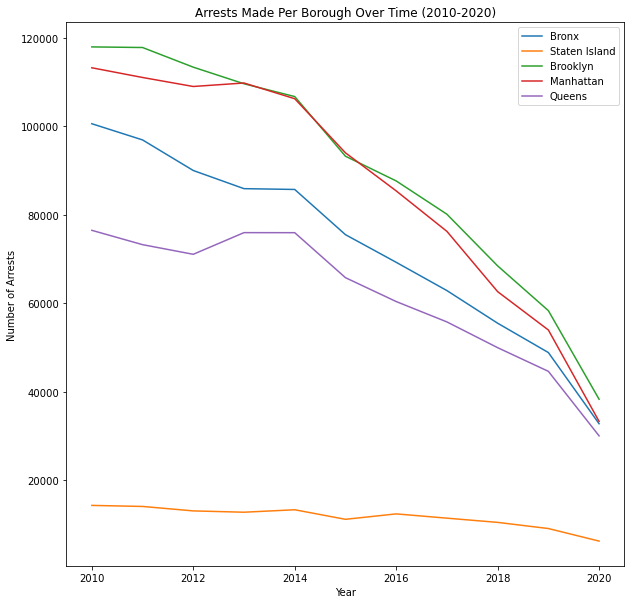

In [19]:
plt.figure(figsize=(10,10))
sns.lineplot(x=borough['years'], y=borough['Bronx_Arrest'])  
sns.lineplot(x=borough['years'], y=borough['Staten_Arrest'])
sns.lineplot(x=borough['years'], y=borough['Brooklyn_Arrest'])
sns.lineplot(x=borough['years'], y=borough['Manhattan_Arrest'])
sns.lineplot(x=borough['years'], y=borough['Queens_Arrest']) 

plt.legend(["Bronx", "Staten Island", "Brooklyn", "Manhattan", "Queens"])
plt.xlabel("Year")
plt.ylabel("Number of Arrests")
plt.title("Arrests Made Per Borough Over Time (2010-2020)")

Text(0, 0.5, 'Number of Arrests')

<Figure size 720x720 with 0 Axes>

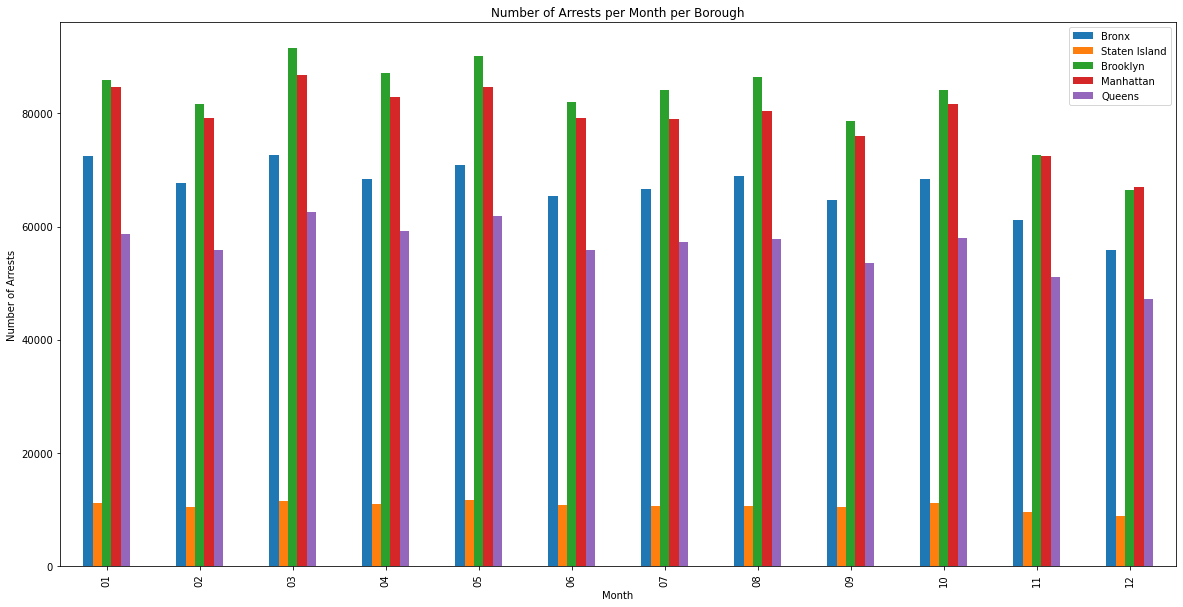

In [93]:
# Plotting
plt.figure(figsize=(10,10))
arrest_table['Month'] = arrest_table['ARREST_DATE'].str[:2]
df = arrest_table
df = df.filter(['ARREST_BORO', 'year', 'Month'])

Bronx = df[df['ARREST_BORO'] == 'B']
totalB = [len(Bronx[Bronx['Month'] == '01']), len(Bronx[Bronx['Month'] == '02']), len(Bronx[Bronx['Month'] == '03']), len(Bronx[Bronx['Month'] == '04']), len(Bronx[Bronx['Month'] == '05']),len(Bronx[Bronx['Month'] == '06']),len(Bronx[Bronx['Month'] == '07']),len(Bronx[Bronx['Month'] == '08']),len(Bronx[Bronx['Month'] == '09']),len(Bronx[Bronx['Month'] == '10']),len(Bronx[Bronx['Month'] == '11']),len(Bronx[Bronx['Month'] == '12'])]

staten = df[df['ARREST_BORO'] == 'S']
totalS = [len(staten[staten['Month'] == '01']), len(staten[staten['Month'] == '02']), len(staten[staten['Month'] == '03']), len(staten[staten['Month'] == '04']), len(staten[staten['Month'] == '05']),len(staten[staten['Month'] == '06']),len(staten[staten['Month'] == '07']),len(staten[staten['Month'] == '08']),len(staten[staten['Month'] == '09']),len(staten[staten['Month'] == '10']),len(staten[staten['Month'] == '11']),len(staten[staten['Month'] == '12'])]

brooklyn = df[df['ARREST_BORO'] == 'K']
totalBr = [len(brooklyn[brooklyn['Month'] == '01']), len(brooklyn[brooklyn['Month'] == '02']), len(brooklyn[brooklyn['Month'] == '03']), len(brooklyn[brooklyn['Month'] == '04']), len(brooklyn[brooklyn['Month'] == '05']),len(brooklyn[brooklyn['Month'] == '06']),len(brooklyn[brooklyn['Month'] == '07']),len(brooklyn[brooklyn['Month'] == '08']),len(brooklyn[brooklyn['Month'] == '09']),len(brooklyn[brooklyn['Month'] == '10']),len(brooklyn[brooklyn['Month'] == '11']),len(brooklyn[brooklyn['Month'] == '12'])]

manhattan = df[df['ARREST_BORO'] == 'M']
totalM = [len(manhattan[manhattan['Month'] == '01']), len(manhattan[manhattan['Month'] == '02']), len(manhattan[manhattan['Month'] == '03']), len(manhattan[manhattan['Month'] == '04']), len(manhattan[manhattan['Month'] == '05']),len(manhattan[manhattan['Month'] == '06']),len(manhattan[manhattan['Month'] == '07']),len(manhattan[manhattan['Month'] == '08']),len(manhattan[manhattan['Month'] == '09']),len(manhattan[manhattan['Month'] == '10']),len(manhattan[manhattan['Month'] == '11']),len(manhattan[manhattan['Month'] == '12'])]

queens = df[df['ARREST_BORO'] == 'Q']
totalQ = [len(queens[queens['Month'] == '01']), len(queens[queens['Month'] == '02']), len(queens[queens['Month'] == '03']), len(queens[queens['Month'] == '04']), len(queens[queens['Month'] == '05']),len(queens[queens['Month'] == '06']),len(queens[queens['Month'] == '07']),len(queens[queens['Month'] == '08']),len(queens[queens['Month'] == '09']),len(queens[queens['Month'] == '10']),len(queens[queens['Month'] == '11']),len(queens[queens['Month'] == '12'])]

arrest_table['Month'] = arrest_table['ARREST_DATE'].str[:2]
df = arrest_table
df = df.filter(['ARREST_BORO', 'year', 'Month'])
month = ['01','02','03','04','05','06','07','08','09','10','11','12']

plotD = pd.DataFrame( {
    "Bronx": totalB,
    "Staten Island": totalS,
    "Brooklyn": totalBr,
    "Manhattan": totalM,
    "Queens":totalQ},
    index=month
)

plotD.plot(kind="bar", figsize=(20,10))
plt.title("Number of Arrests per Month per Borough")
plt.xlabel("Month")
plt.ylabel("Number of Arrests")

#### Based on this bar graph, it shows that Staten Island has kept a constant trend of having a low number of arrests throughout the year.  Brooklyn has has been the highest except for December where Manhattan sightly overtakes it.  The month of December seems to have the lowest number of Arrests throughout the year and March has the most amount of arrests per year.  A conclusion that could be made is that Brooklyn is the borough that has the most amount of people being arrested so making it seem to be the most dangerous.

# KONSTO. REGRESSION BELOW

#### What can be interpreted from this graph is that Brooklyn appears to have a higher number of crimes reported and arrests made compared to the other boroughs in NYC.  Staten Island has been consistent with having the least amount of crime over the years.

In [5]:
arrest_table['Month'] = arrest_table['ARREST_DATE'].str[:2]
test = arrest_table[arrest_table['ARREST_BORO'] == 'B']
btest = test['OFNS_DESC'].value_counts().to_dict()
test

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,...,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lon_Lat,year,Month
8,196785901,05/04/2019,175.0,"SEXUAL ABUSE 3,2",233.0,SEX CRIMES,PL 13052A1,M,B,50,...,25-44,M,BLACK,1011257.0,261130.0,40.883383,-73.902333,POINT (-73.90233330899997 40.88338257900006),2019,05
21,193140208,02/04/2019,157.0,RAPE 1,104.0,RAPE,PL 1303502,F,B,41,...,25-44,M,BLACK,1013232.0,236725.0,40.816392,-73.895296,POINT (-73.89529641399997 40.816391847000034),2019,02
27,190140531,11/18/2018,153.0,RAPE 3,104.0,RAPE,PL 1302501,F,B,44,...,18-24,M,WHITE HISPANIC,1006434.0,244344.0,40.837324,-73.919831,POINT (-73.91983075699994 40.83732351100008),2018,11
28,188086111,09/27/2018,NaN,NaN,NaN,NaN,NaN,NaN,B,50,...,25-44,M,WHITE HISPANIC,1012688.0,270928.0,40.910270,-73.897117,POINT (-73.89711662799994 40.91027045300007),2018,09
40,195423173,04/01/2019,157.0,RAPE 1,104.0,RAPE,PL 1303502,F,B,41,...,18-24,M,BLACK,1013232.0,236725.0,40.816392,-73.895296,POINT (-73.89529641399997 40.816391847000034),2019,04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5153350,206905355,01/02/2020,113.0,"MENACING,UNCLASSIFIED",344.0,ASSAULT 3 & RELATED OFFENSES,PL 1201500,M,B,45,...,25-44,F,BLACK,1031750.0,260352.0,40.881161,-73.828228,POINT (-73.82822806499998 40.881160710000074),2020,01
5153353,207663729,01/09/2020,397.0,"ROBBERY,OPEN AREA UNCLASSIFIED",105.0,ROBBERY,PL 1601502,F,B,48,...,<18,M,WHITE HISPANIC,1011811.0,246833.0,40.844140,-73.900389,POINT (-73.90038861799998 40.84413994500005),2020,01
5153355,209106616,02/06/2020,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,B,49,...,25-44,M,BLACK HISPANIC,1027430.0,251105.0,40.855803,-73.843910,POINT (-73.84390995399998 40.85580274300003),2020,02
5153357,207766697,01/11/2020,569.0,"MARIJUANA, SALE 4 & 5",235.0,DANGEROUS DRUGS,PL 2214000,M,B,43,...,18-24,M,WHITE HISPANIC,1018703.0,241414.0,40.829242,-73.875507,POINT (-73.87550694899994 40.82924217100003),2020,01


In [6]:
bd = test.filter(['year', 'Month', 'ARREST_BORO'])
bd = bd[bd['year'].astype(int) >= 2010]
bd['since_jan_2010'] = (bd['year'].astype(int) - 2010) * 12 + bd['Month'].astype(int) - 1
bd['month_index'] = bd['Month'].astype(int) - 1
table2021 = table2021.filter(['Date', 'ARREST_BORO'])
table2021

,Date,ARREST_BORO
0,09/29/2021,B
1,09/27/2021,K
2,09/25/2021,Q
3,09/25/2021,B
4,09/25/2021,B
...,...,...
115294,01/06/2021,Q
115295,01/05/2021,B
115296,01/01/2021,B
115297,01/07/2021,Q


In [7]:
table2021["month"] = table2021['Date'].str.slice(0,2).astype(int)
table2021["year"] = table2021['Date'].str.slice(6,10).astype(int)
table2021['month_index'] = table2021['month'] - 1
table2021['since_jan_2010'] = (table2021['year'] - 2010) * 12 + table2021['month_index']
table2021

,Date,ARREST_BORO,month,year,month_index,since_jan_2010
0,09/29/2021,B,9,2021,8,140
1,09/27/2021,K,9,2021,8,140
2,09/25/2021,Q,9,2021,8,140
3,09/25/2021,B,9,2021,8,140
4,09/25/2021,B,9,2021,8,140
...,...,...,...,...,...,...
115294,01/06/2021,Q,1,2021,0,132
115295,01/05/2021,B,1,2021,0,132
115296,01/01/2021,B,1,2021,0,132
115297,01/07/2021,Q,1,2021,0,132


In [8]:
table2021 = table2021.drop(columns = ['year', 'month', 'Date'])
table2021

,ARREST_BORO,month_index,since_jan_2010
0,B,8,140
1,K,8,140
2,Q,8,140
3,B,8,140
4,B,8,140
...,...,...,...
115294,Q,0,132
115295,B,0,132
115296,B,0,132
115297,Q,0,132


In [9]:
bd = bd.filter(['month_index', 'since_jan_2010', 'ARREST_BORO'])
bd

,month_index,since_jan_2010,ARREST_BORO
8,4,112,B
21,1,109,B
27,10,106,B
28,8,104,B
40,3,111,B
...,...,...,...
5153350,0,120,B
5153353,0,120,B
5153355,1,121,B
5153357,0,120,B


# PLOTS FOR EACH BURROW

In [55]:
# Plot by months since January
whole = pd.concat([bd, table2021], axis = 0)
whole[whole['since_jan_2010'] < 132]

# brooklyn = whole[whole['ARREST_BORO'] == 'B']
# crime_count = []
# for c, col in brooklyn.groupby(by=['since_jan_2010']):
#     print(len(col))


# brooklyn


,month_index,since_jan_2010,ARREST_BORO
8,4,112,B
21,1,109,B
27,10,106,B
28,8,104,B
40,3,111,B
...,...,...,...
115285,0,132,B
115287,0,132,B
115292,0,132,B
115295,0,132,B


# START REGRESSION BEYOND THIS POINT

In [158]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor

whole_brook = pd.concat([bd, table2021[table2021['ARREST_BORO'] == 'B']], axis = 0)
counts= []
month = []
since = []
for c, col in whole_brook.groupby(by=['since_jan_2010']):
    counts.append(len(col))
    month.append(c % 12)
    since.append(c)
    
combined = pd.DataFrame()
combined['counts'] = counts
combined['month'] = month
combined['since'] = since
X = np.asarray(combined.iloc[:, 1:]).reshape(-1 , 2)
y = np.asarray(combined.iloc[:, 0]).reshape(141,)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .1, random_state = 0)

three = svm.SVR(kernel = 'poly', degree = 3, C = 1).fit(X_train, y_train)
print("polynomial regression of degree 3 test: " + str(three.score(X_test, y_test)) + ", train: " + str(three.score(X_train, y_train)))

four = svm.SVR(kernel = 'poly', degree = 4, C = 1).fit(X_train, y_train)
print("polynomial regression of degree 4 test: " + str(four.score(X_test, y_test)) + ", train: " + str(four.score(X_train, y_train)))

five = svm.SVR(kernel = 'poly', degree = 5, C = 1).fit(X_train, y_train)
print("polynomial regression of degree 5 test: " + str(five.score(X_test, y_test)) + ", train: " + str(five.score(X_train, y_train)))

eight = svm.SVR(kernel = 'poly', degree = 8, C = 1).fit(X_train, y_train)
print("polynomial regression of degree 8 test: " + str(eight.score(X_test, y_test)) + ", train: " + str(eight.score(X_train, y_train)))

rfr = RandomForestRegressor(max_depth = 6, n_estimators = 400).fit(X_train, y_train)
print("random forest regression test: " + str(rfr.score(X_test, y_test)) + ", train: " + str(rfr.score(X_train, y_train)))

etr = ExtraTreesRegressor(bootstrap = True, max_features = 2).fit(X_train, y_train)
print("extra trees regression test: " + str(etr.score(X_test, y_test)) + ", train: " + str(etr.score(X_train, y_train)))


polynomial regression of degree 3 test: 0.6285727552539302, train: 0.6682974178355152
polynomial regression of degree 4 test: 0.7578036809640228, train: 0.7355455401678482
polynomial regression of degree 5 test: 0.7335945613205718, train: 0.6807437252749095
polynomial regression of degree 8 test: 0.5828449746747786, train: 0.5300224398729578
random forest regression test: 0.9529612784639155, train: 0.9872612496403506
extra trees regression test: 0.9624627566153449, train: 0.9918325998759483


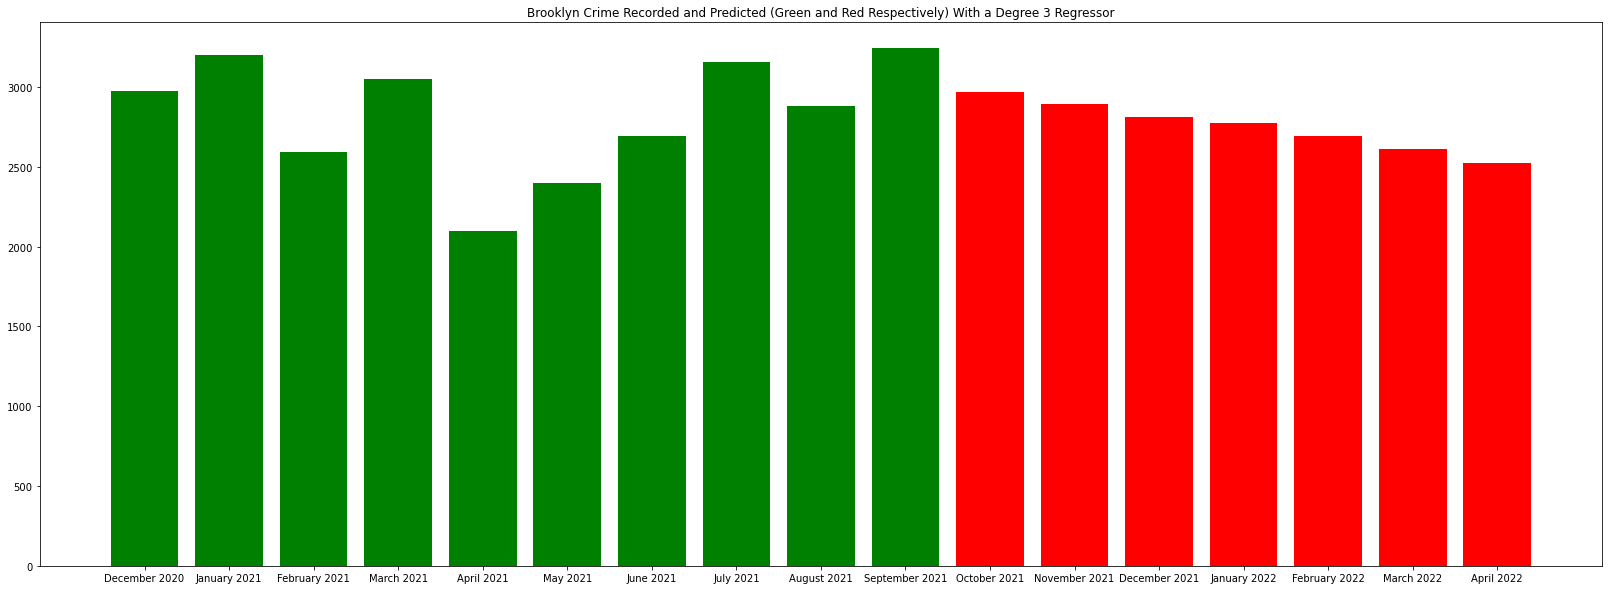

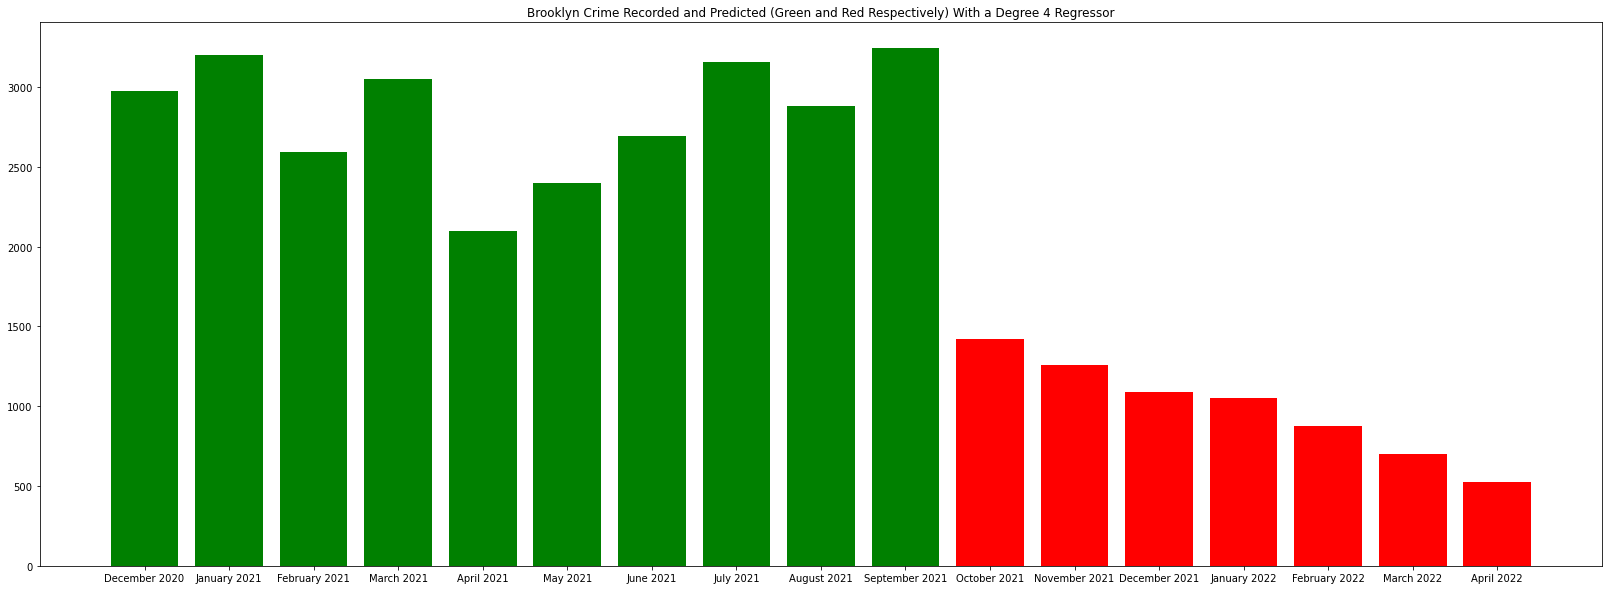

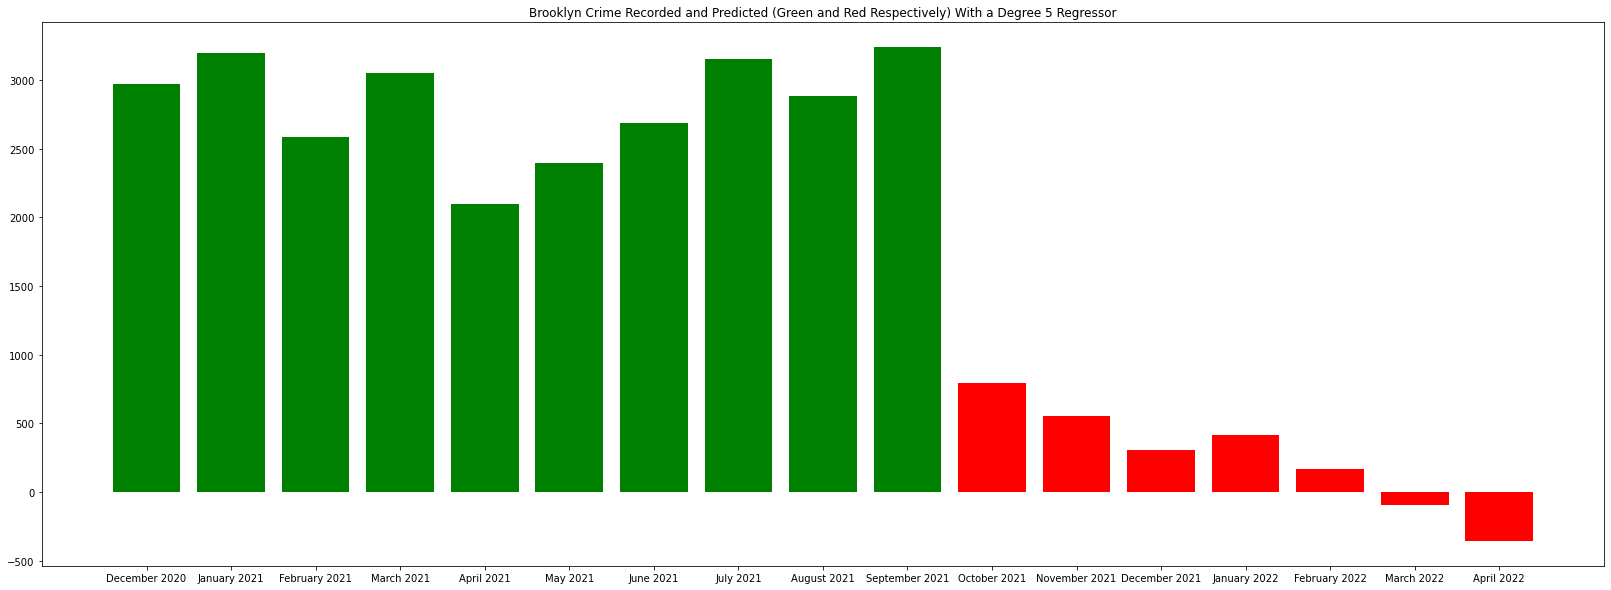

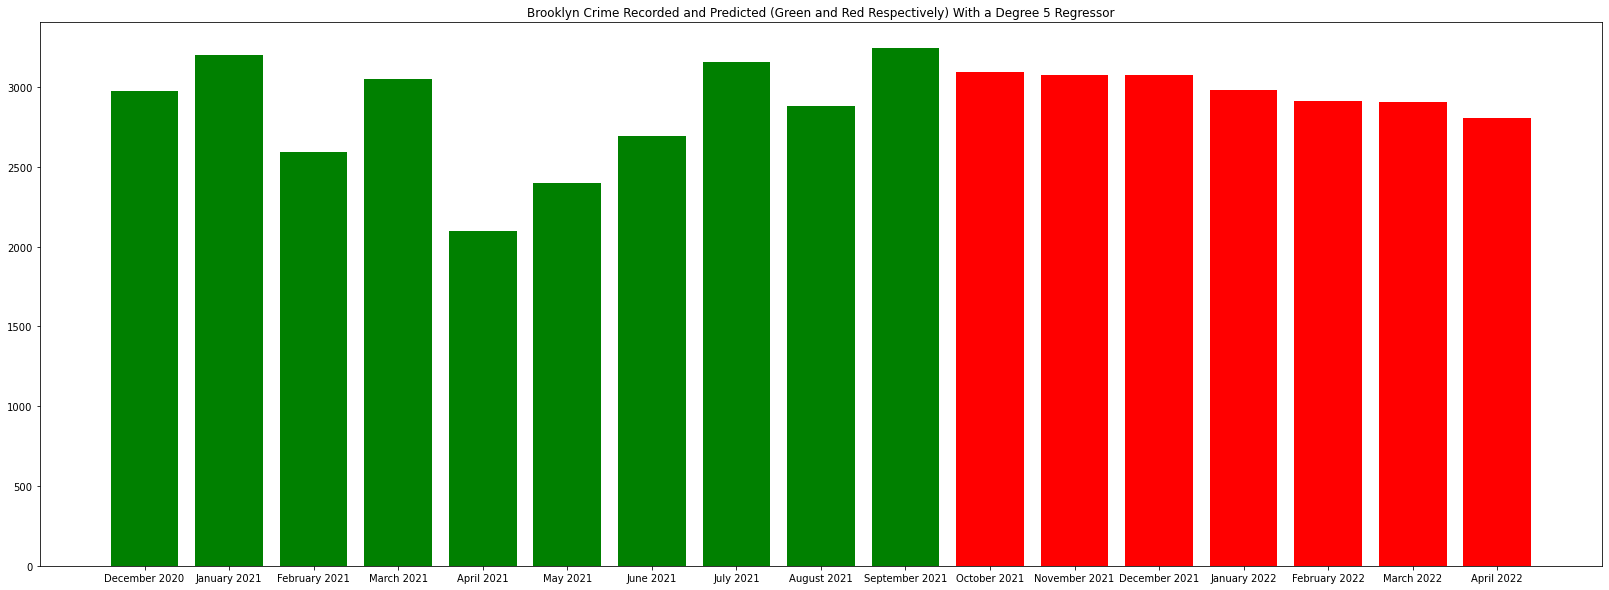

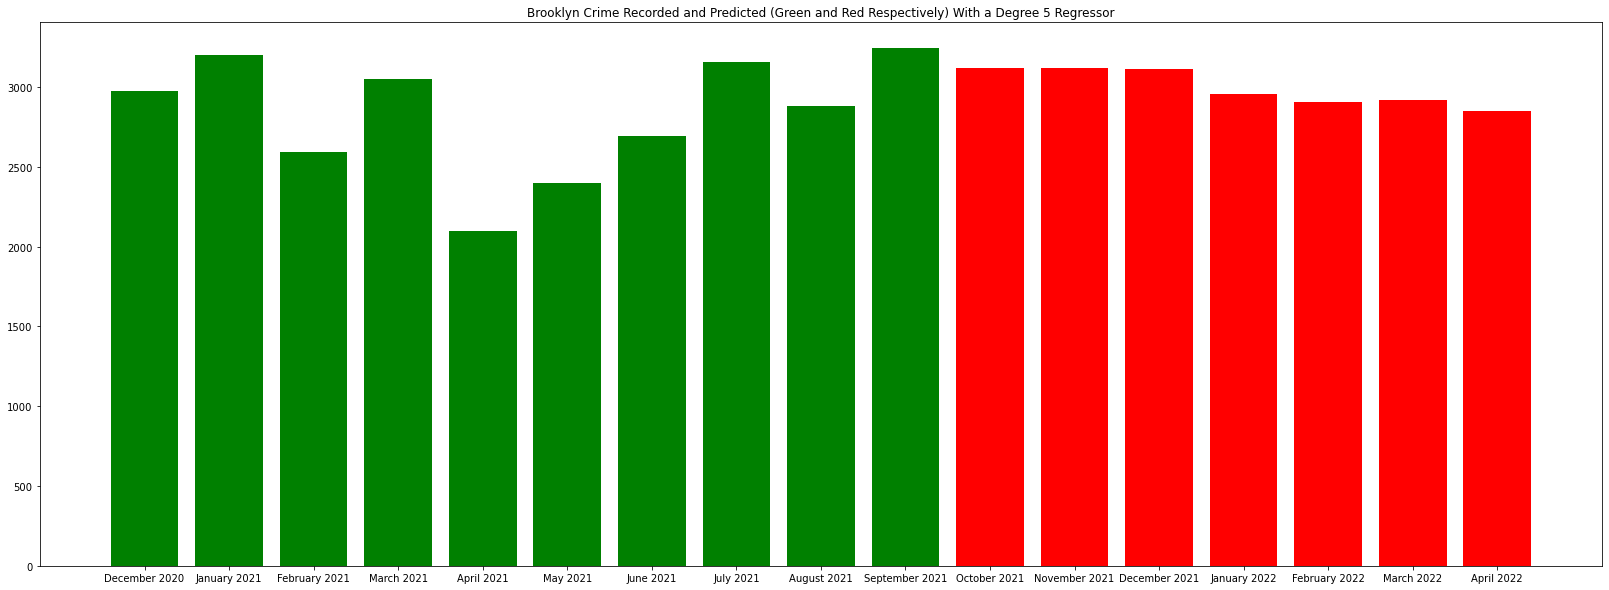

In [159]:
prev_ten = []
for i in range(0, 10):
    prev_ten.append(int(combined[combined['since'] > 130].counts.iloc[i]))

three_arr = []
for i in range(0,7):
    three_arr.append(int(three.predict([[(9 + i) % 12,141 + i]])))
    
four_arr = []
for i in range(0,7):
    four_arr.append(int(four.predict([[(9 + i) % 12,141 + i]])))

five_arr = []
for i in range(0,7):
    five_arr.append(int(five.predict([[(9 + i) % 12,141 + i]])))
    
five_arr = []
for i in range(0,7):
    five_arr.append(int(five.predict([[(9 + i) % 12,141 + i]])))
    
rf_arr = []
for i in range(0,7):
    rf_arr.append(int(rfr.predict([[(9 + i) % 12,141 + i]])))

et_arr = []
for i in range(0,7):
    et_arr.append(int(etr.predict([[(9 + i) % 12,141 + i]])))
    


col = ["Green", "Green", "Green", "Green", "Green", "Green", "Green", "Green", "Green", "Green", "Red", "Red", "Red", "Red", "Red", "Red", "Red"]
months = ["December 2020", "January 2021", "February 2021", "March 2021", "April 2021", "May 2021", "June 2021", "July 2021", "August 2021", "September 2021", "October 2021", "November 2021", "December 2021", "January 2022", "February 2022", "March 2022", "April 2022"]

f, ax = plt.subplots(figsize=(28,10))
comb = np.concatenate((prev_ten, three_arr), axis = None)
plt.bar(months, comb, width = .8, color = col)
plt.title("Brooklyn Crime Recorded and Predicted (Green and Red Respectively) With a Degree 3 Regressor")
plt.show()

f, ax = plt.subplots(figsize=(28,10))
comb = np.concatenate((prev_ten, four_arr), axis = None)
plt.bar(months, comb, width = .8, color = col)
plt.title("Brooklyn Crime Recorded and Predicted (Green and Red Respectively) With a Degree 4 Regressor")
plt.show()

f, ax = plt.subplots(figsize=(28,10))
comb = np.concatenate((prev_ten, five_arr), axis = None)
plt.bar(months, comb, width = .8, color = col)
plt.title("Brooklyn Crime Recorded and Predicted (Green and Red Respectively) With a Degree 5 Regressor")
plt.show()

f, ax = plt.subplots(figsize=(28,10))
comb = np.concatenate((prev_ten, rf_arr), axis = None)
plt.bar(months, comb, width = .8, color = col)
plt.title("Brooklyn Crime Recorded and Predicted (Green and Red Respectively) With a Degree 5 Regressor")
plt.show()

f, ax = plt.subplots(figsize=(28,10))
comb = np.concatenate((prev_ten, et_arr), axis = None)
plt.bar(months, comb, width = .8, color = col)
plt.title("Brooklyn Crime Recorded and Predicted (Green and Red Respectively) With a Degree 5 Regressor")
plt.show()





In [113]:
# rfr = RandomForestRegressor().fit(X_train, y_train)
combined[combined['since'] > 130]

,counts,month,since
131,2972,11,131
132,3201,0,132
133,2589,1,133
134,3051,2,134
135,2097,3,135
136,2400,4,136
137,2691,5,137
138,3158,6,138
139,2882,7,139
140,3243,8,140


# DELETE?
### By doing this, take the dataframes and add the number of arrests from the large dataframe to the number of arrests from the smaller dataframe for each borough.  After that, divide that number by the total number of arrests to get a percentage for each borough.  Do the same thing with the number of crime complaints.  With those values then store it into its own variable making it easier to use for later

In [ ]:
bronxArrest = (len(arrest_table[arrest_table['ARREST_BORO'] == 'B']) + len(table2021[table2021['ARREST_BORO'] == 'B']))/(len(report_table['BORO_NM']) + len(report2021['BORO_NM']))
statenArrest = (len(arrest_table[arrest_table['ARREST_BORO'] == 'S']) + len(table2021[table2021['ARREST_BORO'] == 'S']))/(len(report_table['BORO_NM']) + len(report2021['BORO_NM']))
brooklynArrest = (len(arrest_table[arrest_table['ARREST_BORO'] == 'K']) + len(table2021[table2021['ARREST_BORO'] == 'K']))/(len(report_table['BORO_NM']) + len(report2021['BORO_NM']))
manhattanArrest = (len(arrest_table[arrest_table['ARREST_BORO'] == 'M']) + len(table2021[table2021['ARREST_BORO'] == 'M']))/(len(report_table['BORO_NM']) + len(report2021['BORO_NM']))
queensArrest = (len(arrest_table[arrest_table['ARREST_BORO'] == 'Q']) + len(table2021[table2021['ARREST_BORO'] == 'Q']))/(len(report_table['BORO_NM']) + len(report2021['BORO_NM']))

bronxComplain = (len(report_table[report_table['BORO_NM'] == 'BRONX']) + len(report2021[report2021['BORO_NM'] == 'BRONX']))/(len(report_table['BORO_NM']) + len(report2021['BORO_NM']))
statenComplain = (len(report_table[report_table['BORO_NM'] == 'STATEN ISLAND']) + len(report2021[report2021['BORO_NM'] == 'STATEN ISLAND']))/(len(report_table['BORO_NM']) + len(report2021['BORO_NM']))
brooklynComplain = (len(report_table[report_table['BORO_NM'] == 'BROOKLYN']) + len(report2021[report2021['BORO_NM'] == 'BROOKLYN']))/(len(report_table['BORO_NM']) + len(report2021['BORO_NM']))
manhattanComplain = (len(report_table[report_table['BORO_NM'] == 'MANHATTAN']) + len(report2021[report2021['BORO_NM'] == 'MANHATTAN']))/(len(report_table['BORO_NM']) + len(report2021['BORO_NM']))
queensComplain = (len(report_table[report_table['BORO_NM'] == 'QUEENS']) + len(report2021[report2021['BORO_NM'] == 'QUEENS']))/(len(report_table['BORO_NM']) + len(report2021['BORO_NM']))

#### Now plot the data found for a better visualization

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))

labels = ['Bronx', 'Staten Island', 'Brooklyn', 'Manhattan', 'Queens']

arr= [bronxArrest, statenArrest, brooklynArrest, manhattenArrest, queensArrest]
comp = [bronxComplain, statenComplain, brooklynComplain, manhattanComplain, queensComplain]

rectangle1 = ax.bar(np.arange(len(labels)) - (.35/2), arr, .35, label='Arrests')
rectangle2 = ax.bar(np.arange(len(labels)) + (.35/2), comp, .35, label='Crime Reported')

tic = np.arange(len(labels))

ax.set_xticks(tic)
ax.set_xticklabels(labels)
ax.bar_label(rectangle1)
ax.bar_label(rectangle2)

ax.set_ylabel("Reported")
ax.set_xlabel("Boroughs")
ax.legend()
ax.set_title("Percentage of Crimes Reported and Arrests per Borough")
fig.tight_layout()
plt.show()